(edaquickstart)=
# Introduzione alla data analisi

## Introduzione

In questo capitolo presenteremo alcuni strumenti che possono essere usati per l'analisi esplorativa dei dati in Python. In particolare, ci concentreremo su una struttura chiamata *DataFrame*. Nella loro forma più semplice, i DataFrame sono una rappresentazione tabulare dei dati con righe e colonne. Per fare un esempio, considereremo qui i dati *Palmer Archipelago (Antarctica) penguin*. Questi dati sono stati raccolti dal 2007 al 2009 da Kristen Gorman con il *Palmer Station Long Term Ecological Research Program* che fa parte del *US Long Term Ecological Research Network*.

![](images/emperor_penguin.jpg)

## Importare i dati in pandas

Per prima cosa dobbiamo importare i pacchetti che useremo nel resto di questo capitolo.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import matplotlib_inline.backend_inline

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

# Set seed for reproducibility
np.random.seed(10)

Il dataset di cui ci occupiamo può essere recuperato in vari modi: può essere scaricato da internet, può essere importato da un file csv esterno, oppure può essere caricato da `seaborn`. Questa è la strada che seguiremo qui. Il modulo `seaborn` contiene i seguenti set di dati:

In [119]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Carichiamo il set di dati `penguins`:

In [120]:
df=sns.load_dataset('penguins')

Per caricare i dati da un file esterno si possono usare i comandi `df = pd.read_csv(...)` o `df = pd.read_stata(...)`. Se vogliamo scaricare i dati `palmerpenguins` da Internet possiamo usare il comando seguente:

In [85]:
temp = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/1a19e36ba583887a4630b1f821e3a53d5a4ffb76/data-raw/penguins_raw.csv')

Continuiamo qui con l'oggetto `df` che abbiamo creato.  Troviamo la classe dell'istanza `df`.

In [82]:
type(df)

pandas.core.frame.DataFrame

L'oggetto `df` appartiene alla classe `pandas.DataFrame`. 

## Il DataFrame

Un DataFrame è una struttura di dati bidimensionale che può memorizzare dati di diversi tipi (inclusi caratteri, numeri interi, dati categoriali, ...) in colonne. Un DataFrame è molto simile a una matrice. Come una matrice, un DataFrame memorizza i valori in una "griglia" di righe e colonne. 

Se si lavora con dati tabulari, è bene provare a utilizzare il cosiddetto formato "tidy data". Si tratta di dati con un'osservazione per riga e una variabile per colonna, i quali sono organizzati in questo modo:

![](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

Ogni riga di un DataFrame rappresenta una "osservazione". Un'osservazione è un'entità o un evento coerente per il quale sono state registrate delle informazioni. Ogni colonna di un DataFrame rappresenta una misurazione o un'informazione che è stata registrata per ciascuna delle osservazioni. Ad esempio, le osservazioni in un frame di dati potrebbero essere delle persone per le quali sono state effettuate alcune misurazioni fisiche o demografiche, ma potrebbero essere qualunque altra cosa, come città o eventi... Nel DataFrame che stiamo usando quale esempio, le osservazioni sono pinguini. 

Ogni riga di un DataFrame può contenere valori di tipi eterogenei, poiché non tutte le informazioni registrate su ciascuna osservazione sono necessariamente dello stesso tipo. Ad esempio, il DataFrame dei pinguini registra sia variabili quantitative (la lunghezza del becco, la massa corporea, ...) che variabili categoriali (la specie, l'isola dove vivono, il genere).

Il formato *tidy data* non è appropriato per tutte le analisi dei dati, ma è opportuno utilizzarlo comunque come modalità di default di immaggazinamento dei dati; sarà poi facile trasformarlo per ottenere la struttura del DataFrame appropriata per qualunque specifica analisi dei dati.

Possiamo ottenere il nome delle colonne del nostro DataFrame nel modo seguente.

In [4]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Oppure, possiamo stampare i nomi delle colonne con un ciclo for.

In [5]:
for col in df.columns:
    print(col)

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex


Oppure ancora, in maniera più semplice, usando una *list comprehension*:

In [6]:
[print(col) for col in df.columns]

species
island
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
sex


[None, None, None, None, None, None, None]

Questo è il significato delle variabili (colonne):

- species: a factor denoting penguin type (Adélie, Chinstrap and Gentoo)
- island: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- bill_length_mm: a number denoting bill length (millimeters)
- bill_depth_mm: a number denoting bill depth (millimeters)
- flipper_length_mm: an integer denoting flipper length (millimeters)
- body_mass_g: an integer denoting body mass (grams)
- sex: a factor denoting sexuality (female, male)

Quali sono le dimensioni del DataFrame `df`?

In [7]:
df.shape

(344, 7)

Il DataFrame `df` è costituito da 344 righe e 7 colonne. Esaminiamo il contenuto di `df`.

In [8]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [83]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,4.925,-0.368067
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,4.850,-0.768067
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,5.750,2.831933
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,5.200,-2.368067
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male,5.400,2.331933


In [9]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Tipi di dati

Un pandas DataFrame può contenere dati di tipi diversi: 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Estrarre i dati dal DataFrame

### Colonne

Ci sono molti modi per estrarre le colonne da un `pandas.DataFrame`. La sintassi più semplice è quella di usare le parentesi quadre. Ad esempio, per ottenere una singola colonna, usiamo il nome della colonna tra virgolette:

In [45]:
df['bill_length_mm']

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64

oppure, in maniera equivalente, possiamo usare la seguente sintassi

In [65]:
print(df.bill_length_mm)

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64


Le colonne hanno l'attributo `dtype`:

In [47]:
df['bill_length_mm'].dtype

dtype('float64')

In [48]:
df['island'].dtype

CategoricalDtype(categories=['Biscoe', 'Dream', 'Torgersen'], ordered=False)

Per selezionare colonne multiple possiamo usare le doppie parentesi quadre:

In [49]:
df[['sex', 'bill_length_mm']]

,sex,bill_length_mm
0,Male,39.1
1,Female,39.5
2,Female,40.3
4,Female,36.7
5,Male,39.3
...,...,...
338,Female,47.2
340,Female,46.8
341,Male,50.4
342,Female,45.2


Talvolta vogliamo selezionare un sottoinsieme di colonne sulla base di un particolare tipo di dati.  Ad esempio:

In [105]:
df.select_dtypes("float")

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,body_mass_kg,bill_length_mm_c,ratio1,ratio2
0,39.1,18.7,181.0,3750.0,3.750,0.276027,2.090909,4.826667
1,39.5,17.4,186.0,3800.0,3.800,0.676027,2.270115,4.894737
2,40.3,18.0,195.0,3250.0,3.250,1.476027,2.238889,6.000000
4,36.7,19.3,193.0,3450.0,3.450,-2.123973,1.901554,5.594203
5,39.3,20.6,190.0,3650.0,3.650,0.476027,1.907767,5.205479
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,4.925,-0.368067,3.445255,4.345178
340,46.8,14.3,215.0,4850.0,4.850,-0.768067,3.272727,4.432990
341,50.4,15.7,222.0,5750.0,5.750,2.831933,3.210191,3.860870
342,45.2,14.8,212.0,5200.0,5.200,-2.368067,3.054054,4.076923


È anche possibile selezionare colonne in base a criteri che fanno riferimento a pattern contenuti nel nome della colonna. Per esempio:

In [109]:
df.loc[:, df.columns.str.contains("mm")]

,bill_length_mm,bill_depth_mm,flipper_length_mm,bill_length_mm_c
0,39.1,18.7,181.0,0.276027
1,39.5,17.4,186.0,0.676027
2,40.3,18.0,195.0,1.476027
4,36.7,19.3,193.0,-2.123973
5,39.3,20.6,190.0,0.476027
...,...,...,...,...
338,47.2,13.7,214.0,-0.368067
340,46.8,14.3,215.0,-0.768067
341,50.4,15.7,222.0,2.831933
342,45.2,14.8,212.0,-2.368067


Altri metodi sono `startswith`, `endswith`, `isnumeric`, e `islower`.

### Righe

Mentre l'indicizzazione delle colonne da un `pandas.DataFrame` è relativamente semplice, l'indicizzazione delle righe presenta alcune sottigliezze frustranti. 

Possiamo utilizzare un indice di `slice` per ottenere un intervallo di righe. Questo è semplice. Per le prime 15 righe usiamo l'indice `0:15`:

In [53]:
print(df[0:15])

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen    

Dato che in Python una sequenza è determinata dal valore iniziale e quello finale, *ma si interrompe ad n-1*, per selezionare una singola riga dobbiamo procedere nel modo seguente. Selezioniamo la prima riga (indice: 0): 

In [54]:
print(df[0:1])

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   

   body_mass   sex  body_mass_kg  bill_length_mm_c  
0     3750.0  Male          3.75          0.276027  


### iloc

Se vogliamo indicizzare righe e colonne, è meglio speficicare esplicitamente a pandas se il nostro indice è una posizione o un nome. L'attributo `iloc` memorizza i dati per posizione (`iloc` è un'abbreviazione di "integer location"). Quindi il modo esplicito per ottenere prima riga, ad esempio, è quello passare l'indice [0] a `iloc`:

In [57]:
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass               3750.0
sex                       Male
body_mass_kg              3.75
bill_length_mm_c      0.276027
Name: 0, dtype: object

È possibile un'indicizzazione per riga e colonna: il primo indice si riferisce alla riga e il secondo alla colonna. Per esempio, per ottere il valore della seconda riga e terza colonna procediamo come segue.

In [58]:
df.iloc[2, 3]

18.0

### loc

Ma solo raramente è utile selezionare colonne per posizione. Le colonne di solito hanno nomi, nel qual caso dovremmo usare quelli invece degli indici di posizione (che possono variare).

Se vogliamo selezionare righe e colonne per nome e non per posizione, l'attributo corrispondente per questa operazione si chiama `loc`.

Abbiamo visto che le colonne hanno nomi, ma anche le righe hanno nomi? In effetti li hanno. I nomi delle righe sono semplicemente le loro posizioni -- gli indici di riga. (In alcuni rari casi alle righe possono essere assegnati dei nomi).

Quindi, sia `iloc` che `loc` danno lo stesso risultato quando selezioniamo una sola riga, perché l'indice intero è sia la posizione che il nome della riga:

In [59]:
df.loc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass               3750.0
sex                       Male
body_mass_kg              3.75
bill_length_mm_c      0.276027
Name: 0, dtype: object

Ma `loc` ci consente di indicizzare ulteriormente una o più colonne per nome, che è il suo vero vantaggio:

In [60]:
df.loc[5, 'bill_length_mm']

39.3

In [61]:
df.loc[5, ['bill_length_mm', 'flipper_length_mm']]

bill_length_mm        39.3
flipper_length_mm    190.0
Name: 5, dtype: object

Si noti nell'output che `Name: 5` indica che ci stiamo riferendo alla sesta riga.

Questi sono i valori delle prime cinque righe sulle due colonne precedenti. Si noti l'uso di `:` per definire un intervallo di valori dell'indice.

In [62]:
df.loc[0:5, ['bill_length_mm', 'flipper_length_mm']]

,bill_length_mm,flipper_length_mm
0,39.1,181.0
1,39.5,186.0
2,40.3,195.0
4,36.7,193.0
5,39.3,190.0


Una piccola variante della sintassi precedente si rivela molto utile.

In [66]:
keep_cols = ['species', 'sex', 'island', 'bill_length_mm']
df1 = df.loc[:, keep_cols]  
print(df1.columns)  

Index(['species', 'sex', 'island', 'bill_length_mm'], dtype='object')


C'è un'ultima importante sottigliezza da notare sugli attributi `loc` e `iloc`. Per vedere di cosa si tratta, assegniamo un sottoinsieme di righe ad un nuovo data frame:

In [63]:
df_subset = df[5:15]
print(df_subset)

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
12  Adelie  Torgersen            41.1           17.6              182.0   
13  Adelie  Torgersen            38.6           21.2              191.0   
14  Adelie  Torgersen            34.6           21.1              198.0   
15  Adelie  Torgersen            36.6           17.8              185.0   
16  Adelie  Torgersen            38.7           19.0              195.0   
17  Adelie  Torgersen            42.5           20.7              197.0   
18  Adelie  Torgersen            34.4           18.4              184.0   
19  Adelie  Torgersen            46.0           21.5              194.0   

    body_mass     sex  body_mass_kg  bill_length_mm_c  
6      3625.0  Female         3.625          0.076027  
7      4675.0    Male         4.675          0.376027  
12    

Si noti che le righe nel nuovo frame mantengono i loro nomi originali. In realtà questo era già vero per il nostro dataframe di partenza, il quale è solo un sottoinsieme di un dataframe più grande.

Una conseguenza importante di ciò è che una volta selezionato un sottoinsieme di righe, i nomi delle righe non corrispondono più alle posizioni delle righe. Questa differenza si manifesta quando usiamo i metodi di indicizzazione `iloc` e `loc`. Fortunatamente non è qualcosa di cui dobbiamo preoccuparci perché molto raramente ci poniamo il problema di selezionare sottoinsiemi di righe facendo riferimento al loro indice naturale. Inoltre, le righe di un frame di dati sono spesso disposte in un ordine arbitrario; sono i valori memorizzati nelle righe che danno loro significato, non la loro posizione nel data frame.

## Pulizia dei dati

Le tre colonne `species`, `island` e `sex` sono di tipo `object`, ovvero Python non è stato in grado di determinare in maniera automatica che tipo di dati questi siano.  Sono dei dati categoriali, per cui possiamo fornire noi questa informazione.

In [44]:
df['species'] = df['species'].astype('category')
df['sex'] = df['sex'].astype('category')
df['island'] = df['island'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass          333 non-null    float64 
 6   sex                333 non-null    category
 7   body_mass_kg       333 non-null    float64 
 8   bill_length_mm_c   333 non-null    float64 
dtypes: category(3), float64(6)
memory usage: 27.7 KB


Chiediamoci ora quanti dati mancanti ci sono.

In [11]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Ci sono dei dati mancanti.  Per semplicità eliminiamo tutte le righe che contengono almeno un dato mancante su qualche colonna. In generale questa non è una buona idea ma lo facciamo comunque qui per fare un esercizio.

In [12]:
df.dropna(inplace=True)
df.shape

(333, 7)

In [39]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64
Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64
Male      168
Female    165
Name: sex, dtype: int64


## Visualizzazione dei dati

### Barplot

Quante osservazioni per ciascuna isola?

<AxesSubplot: >

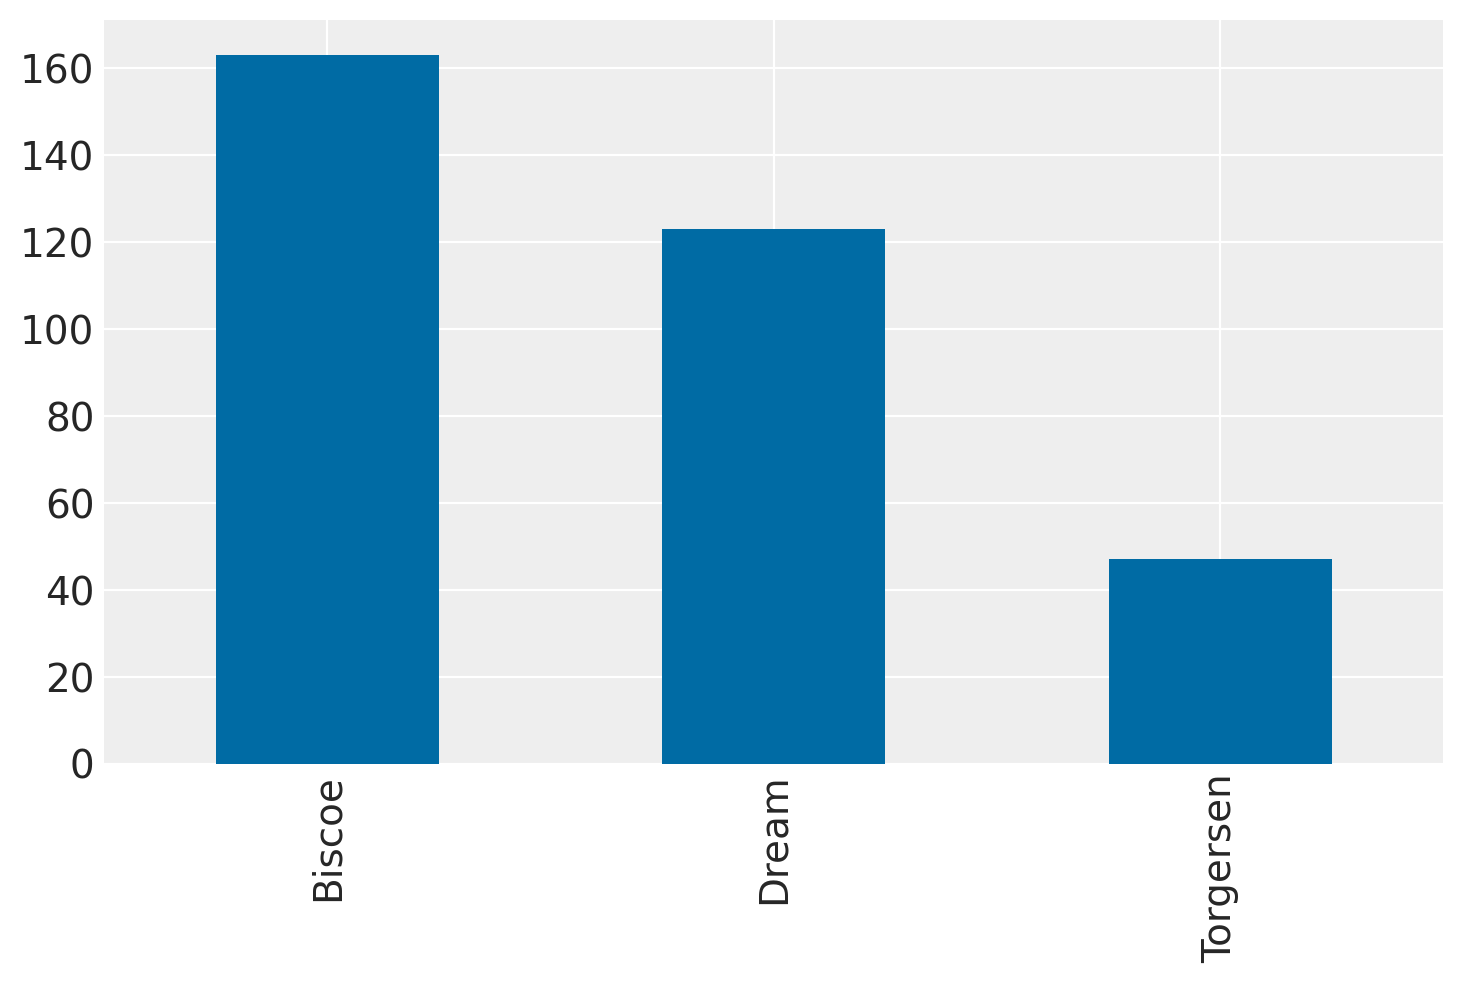

In [13]:
df['island'].value_counts().plot(kind='bar')

Quante osservazioni per ciascuna specie?

<AxesSubplot: >

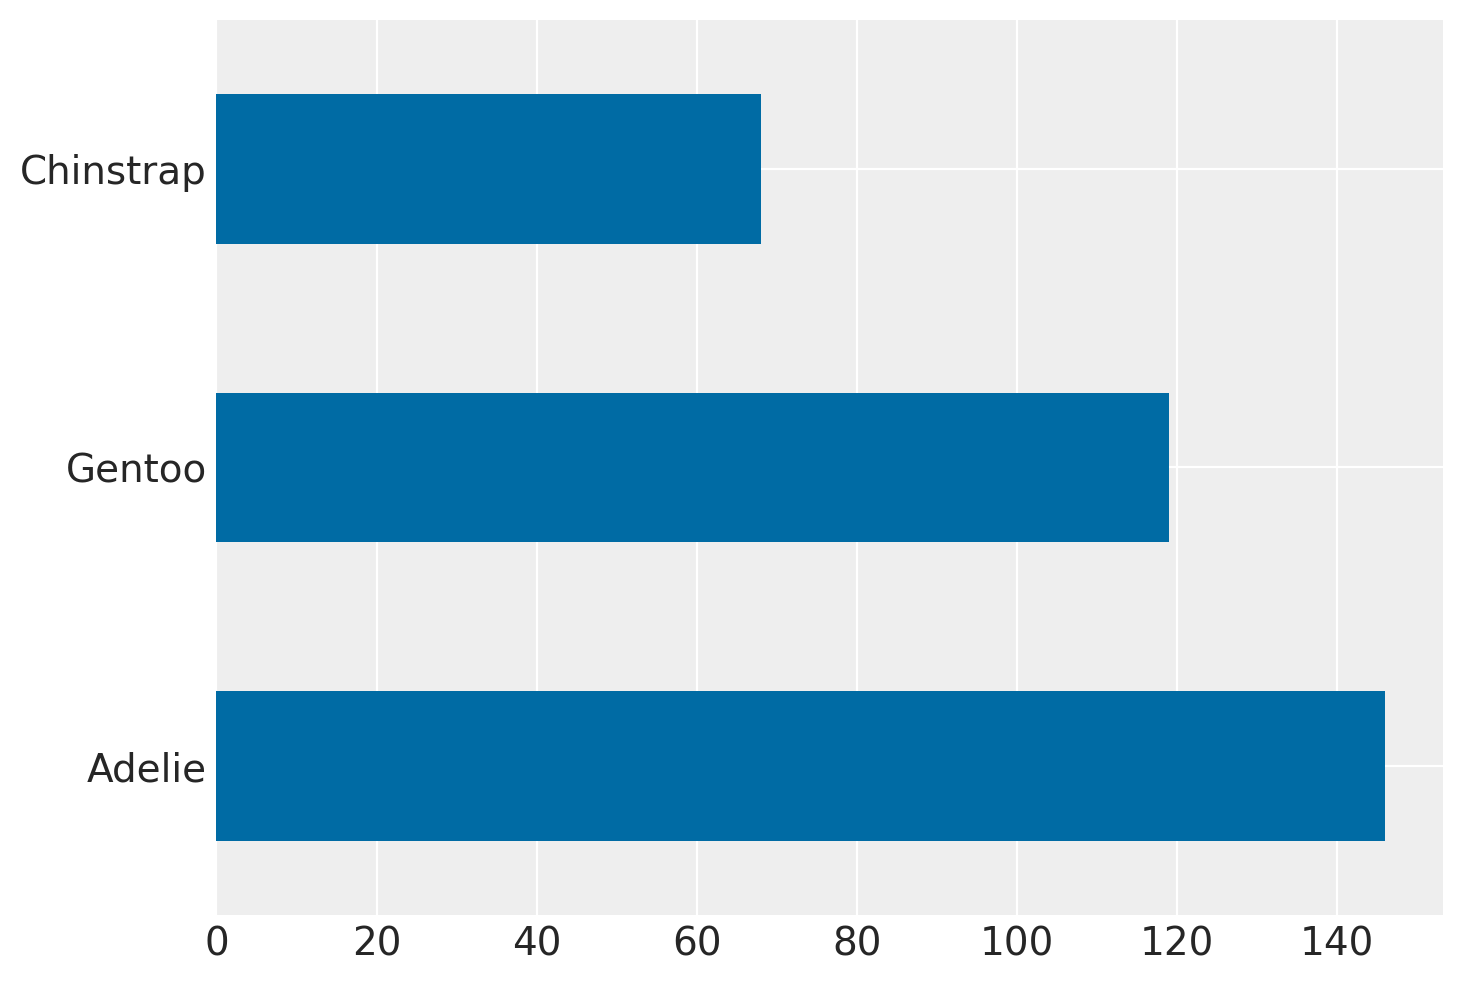

In [14]:
df['species'].value_counts().plot(kind='barh')

### Istrogramma lisciato

<AxesSubplot: ylabel='Density'>

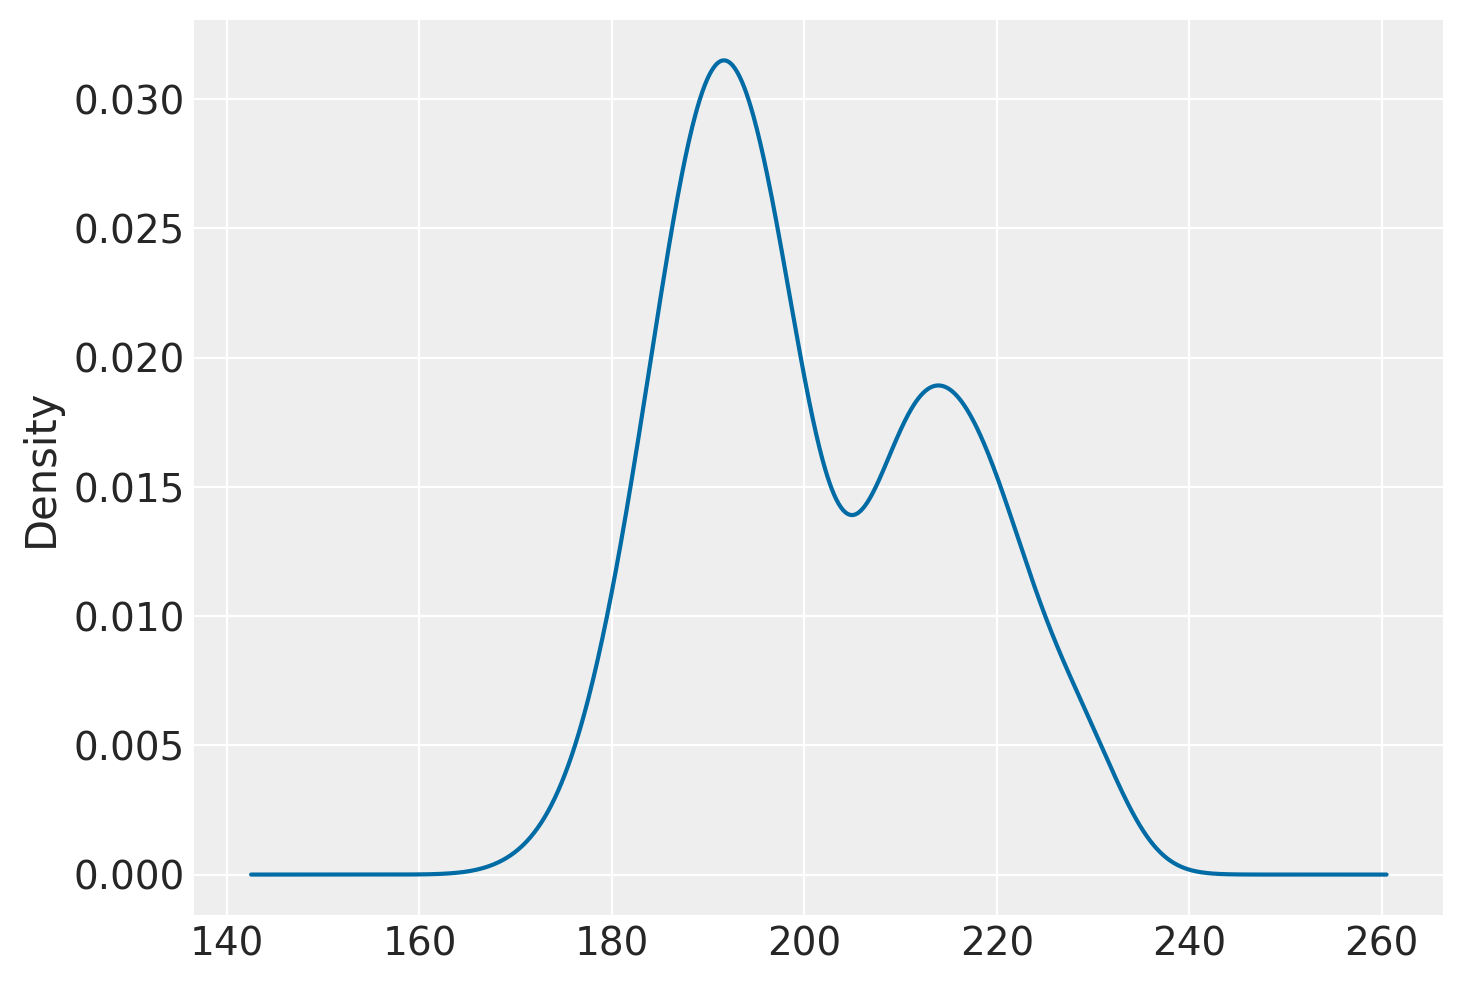

In [15]:
df["flipper_length_mm"].plot.kde(bw_method=0.3)

### Swarmplot

Esaminiamo la lunghezza del becco del pinguino separatamente per ciascuna isola, disinguendo tra le varie specie.

<AxesSubplot: xlabel='island', ylabel='bill_length_mm'>

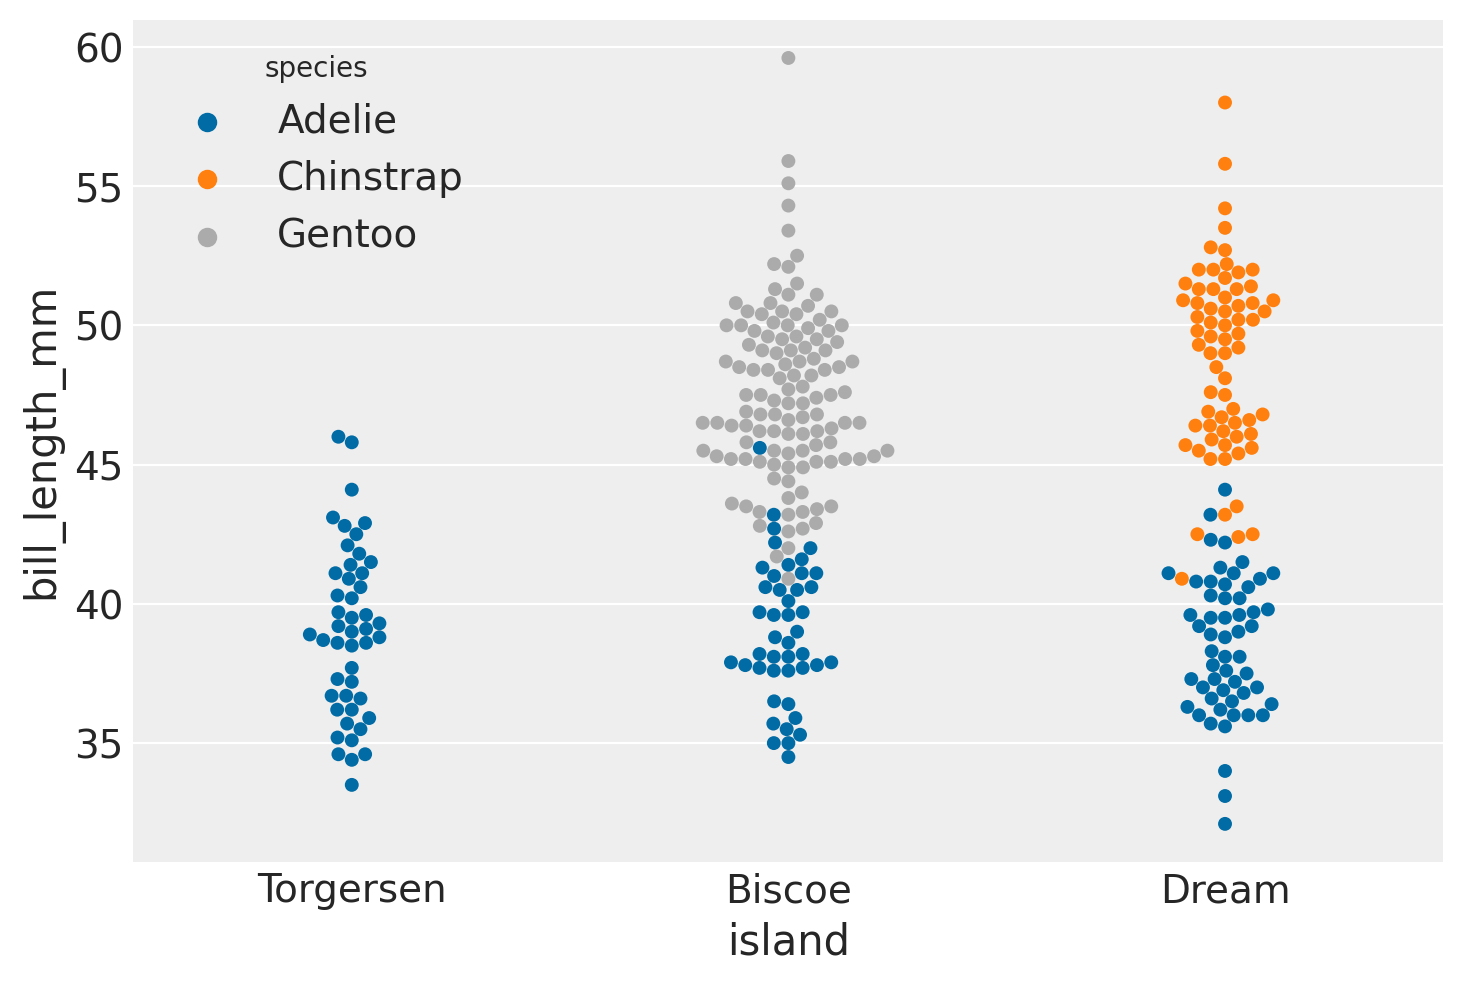

In [16]:
sns.swarmplot(x=df.island,y=df.bill_length_mm,hue=df.species)

Scopriamo che

- Adelie vive in tutte e tre le isole.
- Gentoo vive solo in Biscoe.
- Gentoo e Chinstrap hanno becchi più lunghi rispetto ad Adelie.

### Boxplot

Analizziamo la massa del corpo in funzione della specie, distinguendo le osservazioni in base al genere.

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

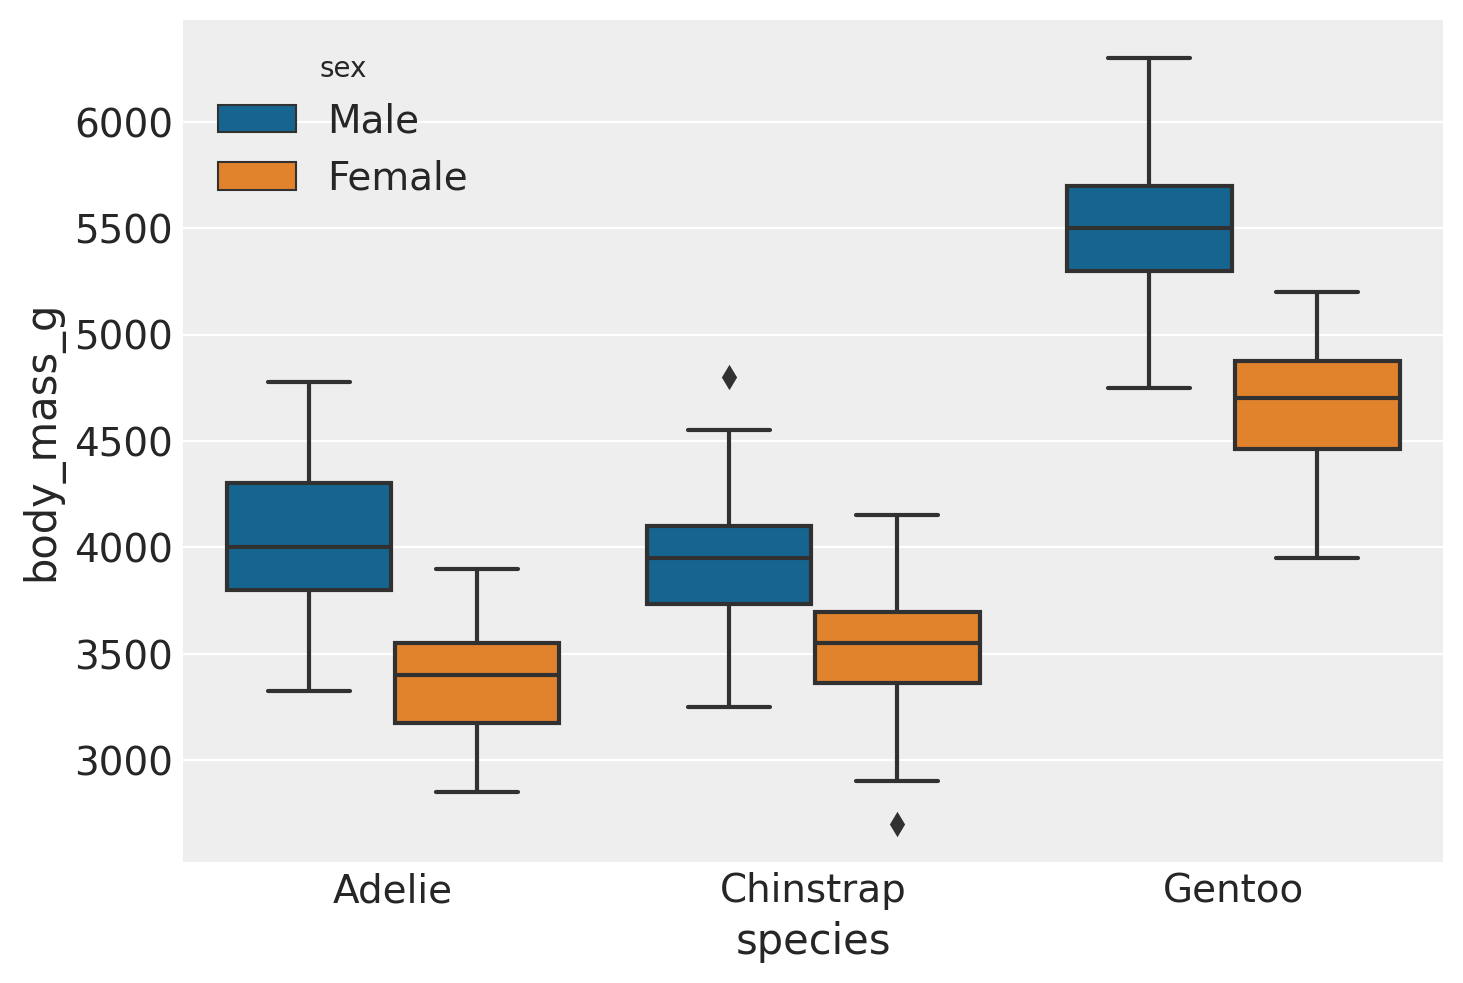

In [17]:
sns.boxplot(x=df.species,y=df.body_mass_g,hue=df.sex)

Dal box-plot è abbastanza evidente che i pinguini maschi pesano più delle femmine in tutte le tre specie, e che i pinguini Gentoo pesano più di Adelie e Chinstrap.

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [19]:
correlation_matrix=df.corr()
correlation_matrix

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_54164/2576092325.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


È più semplice leggere queste informazioni usando la rappresentazione seguente.

<AxesSubplot: >

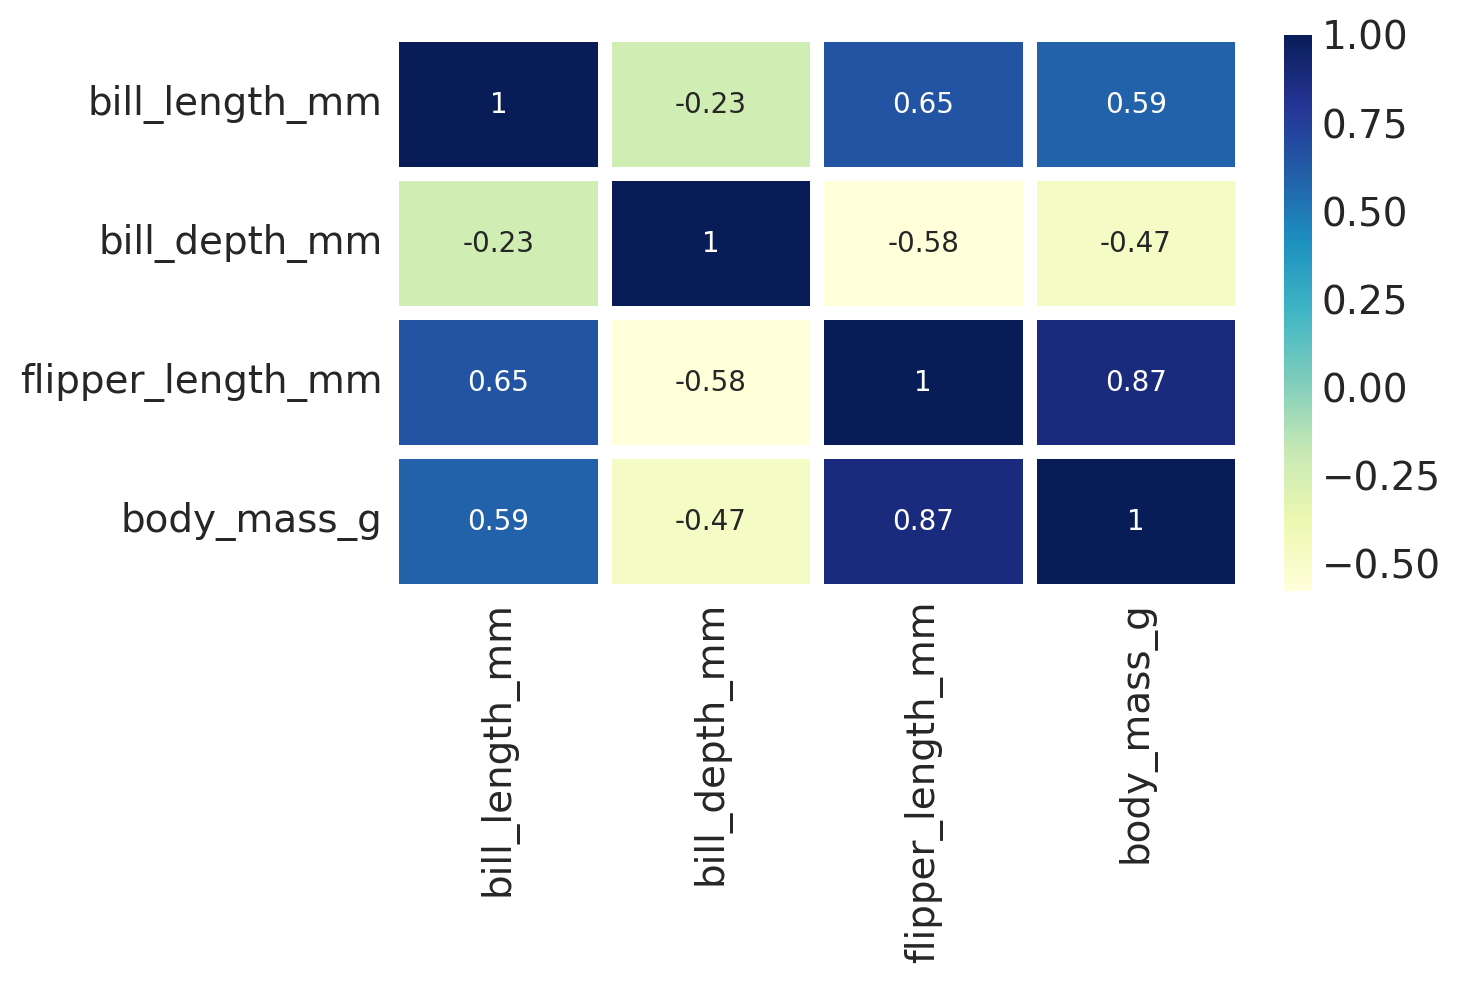

In [20]:
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")

La lunghezza della pinna e la massa corporea sono fortemente associati con una correlazione di 0.87. In altre parole, i pinguini con pinne più lunghe generalmente pesano di più.

Nella figura seguente otteniamo sia diagrammi a dispersione sia degli istogrammi.

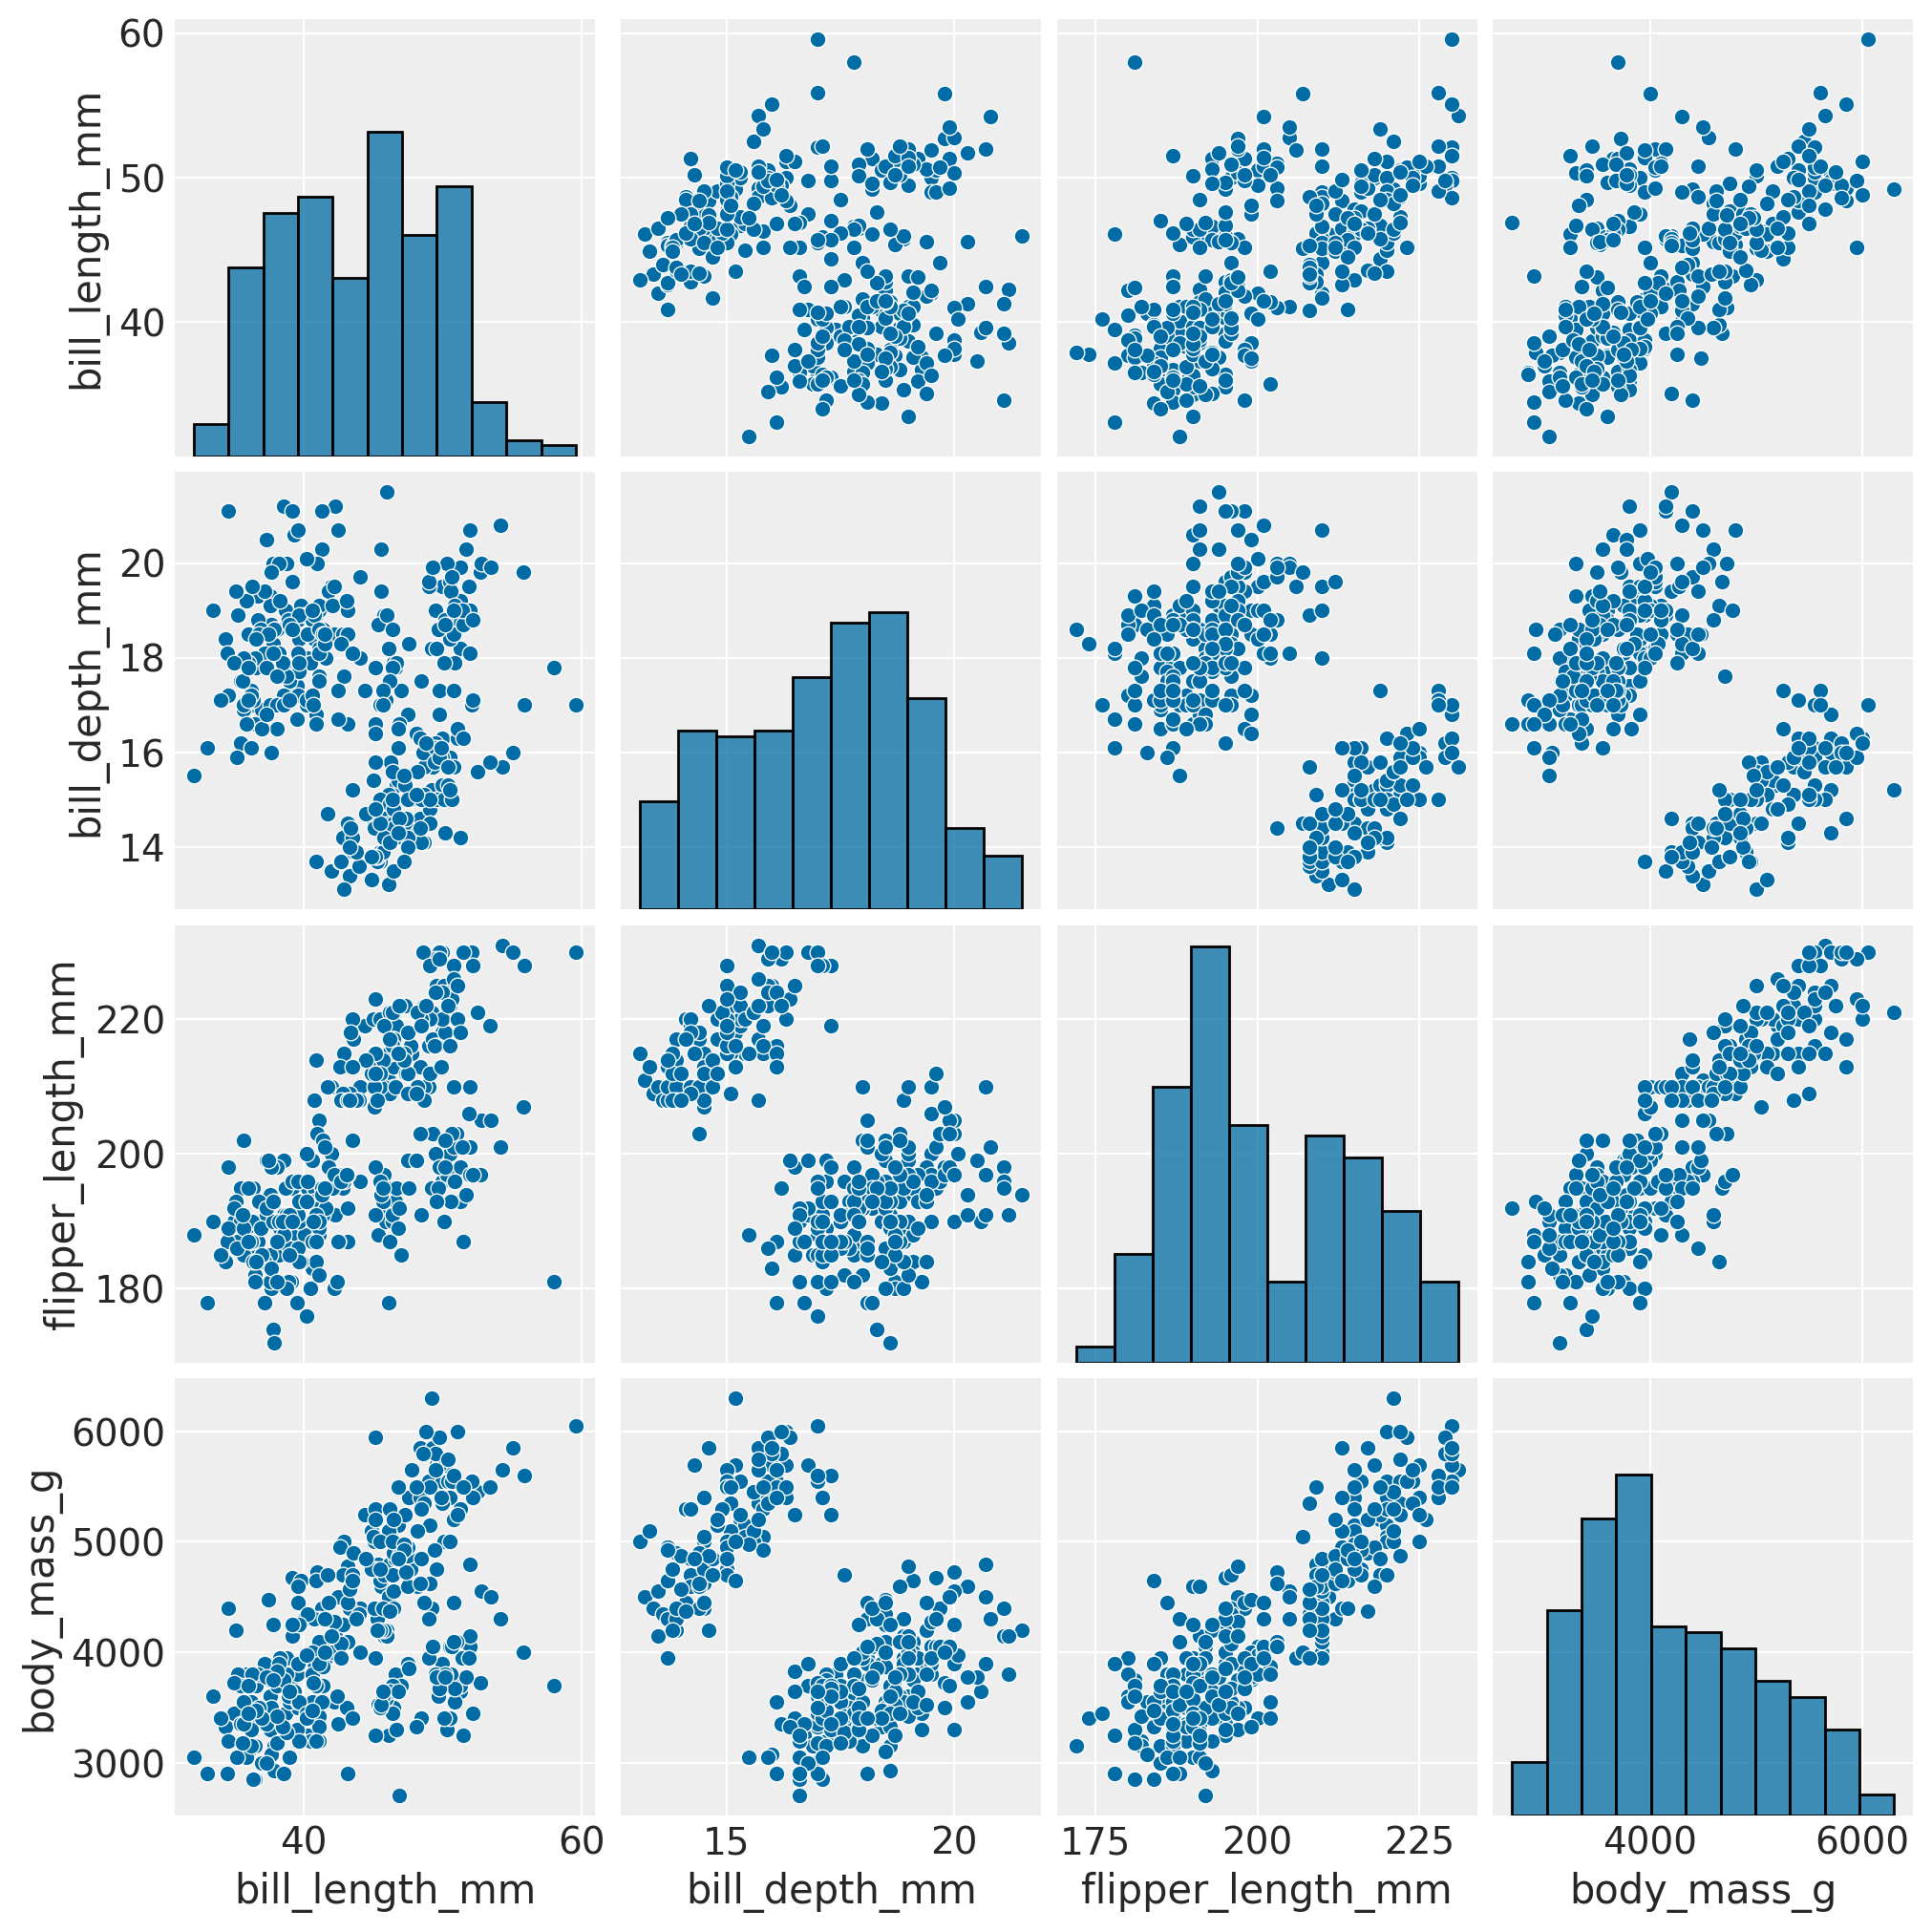

In [21]:
sns.pairplot(data=df)

Vediamo qui sotto un altro esempio di diagramma a dispersione.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

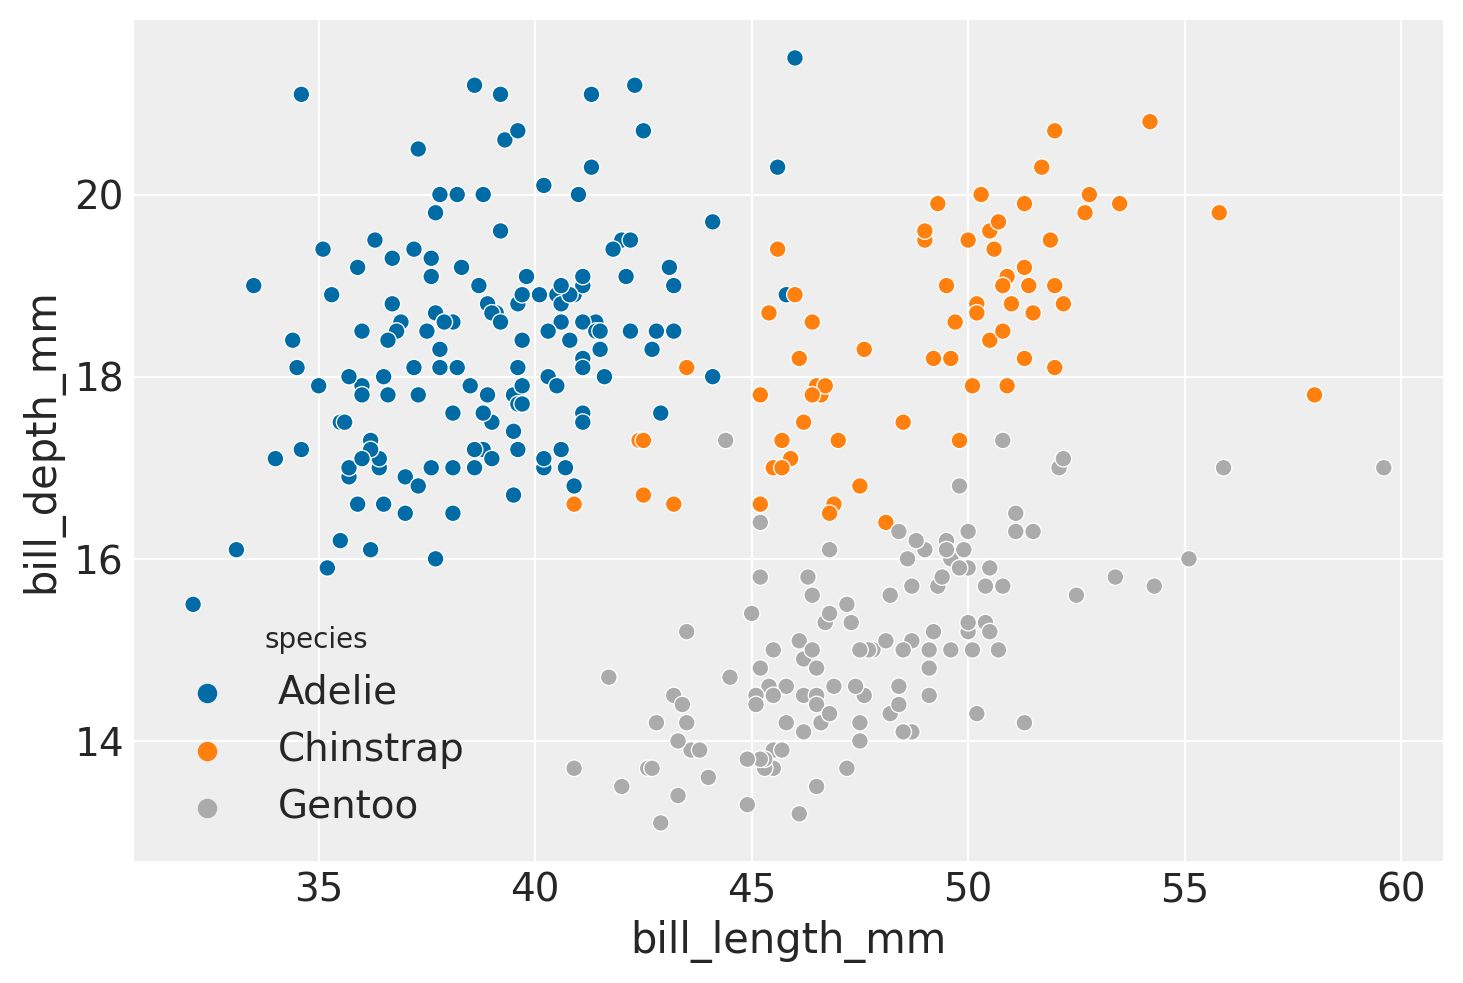

In [84]:
sns.scatterplot(x=df.bill_length_mm,y=df.bill_depth_mm,hue=df.species)

Chiaramente le osservazioni delle tre specie si raggruppano in cluster separati.  
Per ciascuna specie, la lunghezza e la largezza del becco rientrano in un certo intervallo.

## Filtrare righe in maniera condizionale

In precedenza abbiamo selezionato le righe in base alla loro posizione. È molto più comune selezionare le righe del DataFrame in base al loro valore oppure in base a qualche condizione che si può specificare rispetto alle altre colonne.

Iniziamo con un semplice esempio che riguarda una condizione sui valori di una colonna. Quando applichiamo un operatore logico come >, <, ==, !=, il risultato è una sequenza di valori booleani (ovvero True o False), uno per ogni riga nel dataframe, che indica se la condizione è vera o falsa per quella riga.

In [67]:
df['bill_length_mm'] > 40

0      False
1      False
2       True
4      False
5      False
       ...  
338     True
340     True
341     True
342     True
343     True
Name: bill_length_mm, Length: 333, dtype: bool

Questi valori booleani possono a loro volta essere utilizzati come indici (direttamente sul dataframe) per selezionare le righe in cui la condizione è soddisfatta. Per esempio:

In [68]:
print(df[df['bill_length_mm'] > 40])

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
2    Adelie  Torgersen            40.3           18.0              195.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
17   Adelie  Torgersen            42.5           20.7              197.0   
19   Adelie  Torgersen            46.0           21.5              194.0   
26   Adelie     Biscoe            40.6           18.6              183.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass     sex  body_mass_kg  bill_length_mm_c  
2       3250.0  Female        

Gli operatori `&` (e) e `|` (oppure) possono essere utilizzati per combinare più condizioni.

Ad esempio, selezioniamo tutte le righe relative ai pinguini dell'isola Dream che appartengono alla specie Adelie e hanno un becco di lunghezza maggiore di 40 mm.

In [123]:
df[(df['island'] == 'Dream') & (df['species'] == 'Adelie') & (df['bill_length_mm'] > 40)].head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
41,Adelie,Dream,40.8,18.4,195.0,3900.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male


Possiamo semplificare l'instruzione precedente usando `.eval()`:

In [122]:
eval_string = "species == 'Adelie' & island == 'Dream' & bill_length_mm > 40"
df.loc[df.eval(eval_string), :].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
41,Adelie,Dream,40.8,18.4,195.0,3900.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male


In alternativa, possiamo usare `loc`. `.loc` accetta due argomenti. Il primo è un elenco dei nomi delle righe che si voglino selezionare *o* una condizione (cioè un elenco di valori booleani con la stessa lunghezza del dataframe) che seleziona determinate righe (ad esempio `df['column1'] == 'black'`). Il secondo argomento è costituito da un elenco dei nomi di colonne che si desiderano selezionare. In entrambi i casi, `:` è la notazione per 'tutte le righe' o 'tutte le colonne'. 

Come abbiamo visto sopra, se si vuole fare riferimento solo ad una serie di condizioni *o* se si vuole estrarre un insieme di colonne (ma non entrambe le cose), si può semplicemente scrivere `df[condizione(i)]` o `df[colonna(e)]`.

Ecco un esempio con `loc` nel quale abbiamo una condizione costituita da due parti e un elenco di colonne. Qui consideriamo solo i dati dell'isola Dream. Di questi dati vogliamo stampare la lunghezza della pinna.

In [24]:
df.loc[df["island"] == "Dream", "bill_length_mm"]

30     39.5
31     37.2
32     39.5
33     40.9
34     36.4
       ... 
215    55.8
216    43.5
217    49.6
218    50.8
219    50.2
Name: bill_length_mm, Length: 123, dtype: float64

Escludendo i dati dell'isola Dream, consideriamo solo la specie Adelie. Vogliamo le osservazioni relative alla lunghezza della pinna e la massa corporea.

In [26]:
df.loc[(df["island"] != "Dream") & (df["species"] == "Adelie"), ["bill_length_mm", "body_mass_g"]]

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0
...,...,...
127,41.5,4300.0
128,39.0,3050.0
129,44.1,4000.0
130,38.5,3325.0


È anche possibile usare il metodo `.query()` per filtrare le righe di un DataFrame. Per l'esempio precedente abbiamo:

In [89]:
df.query("island != 'Dream' and species == 'Adelie'")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.750,0.276027
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.800,0.676027
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.250,1.476027
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.450,-2.123973
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.650,0.476027
...,...,...,...,...,...,...,...,...,...
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male,4.300,2.676027
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,Female,3.050,0.176027
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male,4.000,5.276027
130,Adelie,Torgersen,38.5,17.9,190.0,3325.0,Female,3.325,-0.323973


Il metodo `query()` può essere utilizzato anche per selezionare le righe in base alle relazioni tra le colonne. Ad esempio,

In [90]:
df.query('bill_length_mm < bill_depth_mm*1.8')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,4.4,-4.223973
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female,3.6,-5.323973


È possibile fare riferimento a variabili non contenute nel DataFrame mediante il carattere `@`.

In [91]:
outside_var = 21
df.query('bill_depth_mm > @outside_var')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,3.80,-0.223973
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,4.40,-4.223973
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male,4.20,7.176027
35,Adelie,Dream,39.2,21.1,196.0,4150.0,Male,4.15,0.376027
49,Adelie,Dream,42.3,21.2,191.0,4150.0,Male,4.15,3.476027
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,Male,4.40,2.476027


## Riordinare le righe

Talvolta è utile riordinare le righe in ordine crescente o decrescente in relazione ai valori qualche colonna. Con **pandas** questo è possibile usando la funzione `.sort_values()`. Si usa `sort_values(columns, ascending=False)` per l'ordine discendente.

In [28]:
df.sort_values(["body_mass_g", "bill_length_mm"], ascending=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,Male
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,Male
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
331,Gentoo,Biscoe,49.8,15.9,229.0,5950.0,Male
...,...,...,...,...,...,...,...
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female


## Manipolare le colonne

### Selezionare le colonne

Per selezione di più colonne in un intervallo possiamo usare `.loc[startrow:stoprow:step, startcolumn:stopcolumn:step]` o `.iloc[start:stop:step, start:stop:step]`. Ad esempio, selezioniamo le colonne comprese tra 'bill_length_mm' e 'body_mass':

In [29]:
df.loc[:, "bill_length_mm":"body_mass_g"]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


Qui sotto selezioniamo ogni decima riga dalla seconda colonna e le colonne comprese tra 'bill_length_mm' e 'body_mass':

In [30]:
df.loc[2::10, "bill_length_mm":"body_mass_g"]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
2,40.3,18.0,195.0,3250.0
17,42.5,20.7,197.0,4500.0
27,40.5,17.9,187.0,3200.0
37,42.2,18.5,180.0,3550.0
48,36.0,17.9,190.0,3450.0
58,36.5,16.6,181.0,2850.0
68,35.9,16.6,190.0,3050.0
78,36.2,16.1,187.0,3550.0
88,38.3,19.2,189.0,3950.0
98,33.1,16.1,178.0,2900.0


Selezioniamo le prime 5 righe dalle ultime 2 colonne:

In [31]:
df.iloc[:4, -2:].head()

,body_mass_g,sex
0,3750.0,Male
1,3800.0,Female
2,3250.0,Female
4,3450.0,Female


È anche possibile selezionare casualmente un campione di righe usando `.sample`. Il metodo `.sample(n)` seleziona casualmente `n` righe. Ad esempio, `.sample(frac=0.4)` seleziona il 40% dei dati. `replace=True` seleziona un campione con reinserimento (l'argomento `weights=` seleziona un numero o una frazione con le probabilità che vengono fornite -- si noti che i pesi passati devono avere la stessa lunghezza del dataframe). Per esempio, estraiamo un campione casuale di 5 righe:

In [32]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
49,Adelie,Dream,42.3,21.2,191.0,4150.0,Male
273,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,Male
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,Male
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male


### Rinominare le colonne con `.rename`

È possibile rinominare tutte le colonne passando una funzione, ad esempio `df.rename(columns=str.lower)` per fare in modo che i nomi delle colonne siano in minuscolo. In alternativa, si crea un dizionario che specifica quali colonne devono essere mappate a cosa:

In [33]:
df = df.rename(columns={"body_mass_g": "body_mass"})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Creare nuove colonne

Creaiamo una nuova colonna con il valore 5 ripetuto su ogni riga.

In [92]:
df['new_column0'] = 5
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c,new_column
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.750,0.276027,5
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.800,0.676027,5
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.250,1.476027,5
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.450,-2.123973,5
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.650,0.476027,5
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,4.925,-0.368067,5
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,4.850,-0.768067,5
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,5.750,2.831933,5
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,5.200,-2.368067,5


Passando una lista tra parentesi quadre, possiamo creare più colonne simultaneamente:

In [94]:
df[["new_column1", "new_column2"]] = [5, 6]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c,new_column,new_column1,new_column2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75,0.276027,5,5,6
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80,0.676027,5,5,6
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25,1.476027,5,5,6
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45,-2.123973,5,5,6
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65,0.476027,5,5,6


Molto spesso vengono create nuove colonne sulla base delle colonne già esistenti. 

![](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)

In [95]:
df["new_column3"] = df["new_column2"] - df["new_column1"]
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c,new_column,new_column1,new_column2,new_column3
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.750,0.276027,5,5,6,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.800,0.676027,5,5,6,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.250,1.476027,5,5,6,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.450,-2.123973,5,5,6,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.650,0.476027,5,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,4.925,-0.368067,5,5,6,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,4.850,-0.768067,5,5,6,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,5.750,2.831933,5,5,6,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,5.200,-2.368067,5,5,6,1


In [34]:
df['body_mass_kg'] = df['body_mass']/1000
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65


Per i dati sui pinguini, creiamo un nuova colonna chiamata `body_mass_kg`. Per fare questo possiamo  usare il metodo `.assign()`.

In [35]:
df = df.assign(body_mass_kg=df["body_mass"] / 1000)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65


Con il metodo `.assign()` è possibile concatenare più passaggi insieme. Questo metodo usa una sintassi speciale chiamata istruzione "lambda", che fornisce un modo per specificare a pandas che desideriamo eseguire l'operazione su ogni riga. Si noti che la parola `row` è arbitraria; potrebbe essere sostituita con qualsiasi altro nome (ad esempio, `x`) ma `row` rende un po' più chiaro ciò che sta accadendo.

In [103]:
df = df.assign(
    ratio1=lambda row: row["bill_length_mm"] / row["bill_depth_mm"],
    ratio2=lambda row: row["flipper_length_mm"] / row["body_mass"] * 100,
)
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass     sex  body_mass_kg  bill_length_mm_c  new_column  new_column1  \
0     3750.0    Male          3.75          0.276027           5            5   
1     3800.0  Female          3.80          0.676027           5            5   
2     3250.0  Female          3.25          1.476027           5            5   
4     3450.0  Female          3.45         -2.123973           5            5   
5     3650.0    Male          3.65          0.476027           5            5   

   new_column2  new_column3    ratio1    ratio2  
0            6    

```{admonition} Nota
Una funzione lambda è una normale funzione Python, tranne per il fatto che non ha nome e tende a essere contenuta in una riga di codice. Una funzione lambda è composta da un argomento, due punti e un'espressione. Ad esempio
```

In [104]:
multiply_plus_one = lambda x, y: x * y + 1
multiply_plus_one(3, 4)

13

## Riepiloghi numerici

Il riepilogo di più valori in un unico indice va sotto il nome di "aggregazione" dei valori. `aggregate()` è un metodo che può essere applicato agli oggetti `pandas.DataFrame` e restituisce un nuovo DataFrame più breve contenente solo i valori aggregati. Il primo argomento di `aggregate()` specifica quale funzione o quali funzioni utilizzare per aggregare i dati. Queste funzioni possono essere funzioni Python o funzioni di un modulo che è stato importato. Molte funzioni di aggregazione comuni possono essere trovate nel modulo `statistics` della libreria standard di Python:

- `median()`: la mediana;
- `mean()`: la media;
- `stdev()`: la deviazione standard;

Se vogliamo applicare più funzioni di aggregazione, allora è più semplice raccogliere prima le funzioni in una lista, e poi passare questa lista al metodo `aggregate()`. 

In [73]:
import statistics

summary_stats = [min, statistics.median, statistics.mean, statistics.stdev, max]
print(df.aggregate(summary_stats))

          species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
min           NaN    NaN       32.100000      13.100000         172.000000   
median  Chinstrap  Dream       44.500000      17.300000         197.000000   
mean          NaN    NaN       43.992793      17.164865         200.966967   
stdev         NaN    NaN        5.468668       1.969235          14.015765   
max           NaN    NaN       59.600000      21.500000         231.000000   

          body_mass   sex  body_mass_kg  bill_length_mm_c  
min     2700.000000   NaN      2.700000     -7.933824e+00  
median  4050.000000  Male      4.050000      7.602740e-02  
mean    4207.057057   NaN      4.207057     -1.002868e-15  
stdev    805.215802   NaN      0.805216      2.962373e+00  
max     6300.000000   NaN      6.300000      1.203193e+01  


/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_54164/429381143.py:4: FutureWarning: ['species', 'island', 'sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df.aggregate(summary_stats))


Si noti che pandas ha applicato le funzioni di riepilogo a ogni colonna, ma ci sono alcune colonne per le quali le statistiche riassuntive non possono calcolare, ovvero tutte le colonne che contengono stringhe anziché numeri. Di conseguenza, vediamo che alcuni dei risultati per tali colonne sono contrassegnati con "NaN". Questa è un'abbreviazione di "Not a Number", talvolta utilizzata nell'analisi dei dati per rappresentare valori mancanti o non definiti.

La colonna `species` in `df` è una variabile a livello nominale. La cosa principale che vogliamo sapere su una colonna di questo tipo è quante osservazioni ci sono in ciascuna categoria. Il metodo `value_counts()`, applicato a una singola colonna, conta il numero di volte in cui ogni valore ricorre:

In [76]:
print(df['species'].value_counts())

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64


Se vogliamo sapere quante osservazioni abbiamo in ciascuna categoria, come proporzione del numero totale di osservazioni, possiamo impostare l'argomento `normalize` come `True`:

In [77]:
print(df['species'].value_counts(normalize=True))

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64


## Ragruppare i dati con `.groupby()`

Molto spesso vogliamo calcolare le statistiche descrittive separatamente per ciascun gruppo di osservazioni -- per esempio, nel caso presente, in base alla specie. Questo si ottiene con il metodo `.groupby()`. Per esempio, ragruppiamo le osservazioni in funzione della specie per poi calcolare le statistiche descrittive definite in precedenza. 

In [79]:
print(df.groupby(['species']).aggregate(summary_stats))

          bill_length_mm                                   bill_depth_mm  \
                     min median       mean     stdev   max           min   
species                                                                    
Adelie              32.1  38.85  38.823973  2.662597  46.0          15.5   
Chinstrap           40.9  49.55  48.833824  3.339256  58.0          16.4   
Gentoo              40.9  47.40  47.568067  3.106116  59.6          13.1   

                                             ... body_mass_kg         \
          median       mean     stdev   max  ...          min median   
species                                      ...                       
Adelie     18.40  18.347260  1.219338  21.5  ...         2.85   3.70   
Chinstrap  18.45  18.420588  1.135395  20.8  ...         2.70   3.70   
Gentoo     15.00  14.996639  0.985998  17.3  ...         3.95   5.05   

                                     bill_length_mm_c                          \
               mean     stdev

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_54164/1634414942.py:1: FutureWarning: ['island', 'sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df.groupby(['species']).aggregate(summary_stats))


Qui sotto troviamo la media di due sole colonne per ciascuna specie.

In [80]:
df.groupby("species")[["body_mass_kg", "flipper_length_mm"]].mean()

,body_mass_kg,flipper_length_mm
species,,
Adelie,3.706164,190.102740
Chinstrap,3.733088,195.823529
Gentoo,5.092437,217.235294


Facciamo la stessa cosa per la deviazione standard.

In [37]:
df.groupby("species")[["body_mass_kg", "flipper_length_mm"]].std()

,body_mass_kg,flipper_length_mm
species,,
Adelie,0.458620,6.521825
Chinstrap,0.384335,7.131894
Gentoo,0.501476,6.585431


### Aggiungere nuove colonne con `.transform()`

Molto spesso è utile inserire una colonna in un dataframe che è il risultato di un `groupby` intermedio e di un'aggregazione. Ad esempio, possiamo centrare i dati (sottrarre la media del gruppo)  o standardizzare per gruppo. 

Di seguito è riportato un esempio dell'uso di `.transform()` per centrare una variabile per ciascuna specie. Si noti che stiamo usando la funzione lambda. Le funzioni lambda sono un modo rapido per scrivere delle funzioni senza dover assegnare loro un nome, ad es. `lambda x: x+1` definisce una funzione che somma uno ad `x`. Nell'esempio seguente, la "x" nella funzione lambda è la variabile `bill_length_mm` che viene ragruppata in base alla specie.

In [38]:
df["bill_length_mm_c"] = df.groupby("species")["bill_length_mm"].transform(lambda x: x - x.mean())
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass,sex,body_mass_kg,bill_length_mm_c
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75,0.276027
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80,0.676027
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25,1.476027
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45,-2.123973
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.65,0.476027


## Riassunto: come accedere a righe, colonne e valori

La presenza di diversi modi per accedere ai valori nei frame di dati può creare confusione. Elenco qui nuovamente i diversi modi per estrarre la prima colonna di un DataFrame (quando quella prima colonna è chiamata `column` e il dataframe è `df`):

- `df.column`
- `df["column"]`
- `df.loc[:, "column"]`
- `df.iloc[:, 0]`

Nota che `:` significa 'tutti gli elementi'! I modi per accedere alle righe sono simili (qui assumiamo che la prima riga si chiami `row`):

- `df.loc["row", :]`
- `df.iloc[0, :]`

Per accedere al primo valore (ovvero il valore nella prima riga, prima colonna):

- `df.column[0]`
- `df["column"][0]`
- `df.iloc[0, 0]`
- `df.loc["row", "column"]`

Negli esempi precedenti, le parentesi quadre forniscono le istruzioni su *dove* selezionare gli elementi dal DataFrame. Tuttavia, le parentesi quadre sono *anche* usate per denotare le liste. Quindi, se vogliamo selezionare *più* colonne o righe, è necessario usare una sintassi come la seguente:

`df.loc[["row0", "row1"], ["column0", "column2"]]`

dove vengono selezionate due righe e due colonne tramite le liste `["row0", "row1"]` e `["column0", "column2"]`. Poiché facciamo riferimento a liste e valori, ci sono due gruppi di parentesi quadre.

```{tip} Suggerimento

Se volete ricordare una sola sintassi per accedere a righe e colonne per *nome*, usate: 

`df.loc[["row0", "row1", ...], ["col0", "col1", ... ]]`

Questa sintassi funziona anche con una singola riga o una singola colonna (o entrambe). Se volete ricordare una sola sintassi per accedere a righe e colonne per *posizione*, usate:

`df.iloc[[0, 1, ...], [0, 1, ...]]` 

Questa sintassi funziona anche con una singola riga o una singola colonna (o entrambe).
```

## Operazioni su righe, colonne e dataframe

### Operazioni con `apply` su righe o colonne

Una delle caratteristiche di **pandas** è che consente di eseguire operazioni su *righe* o *colonne*  tramite il metodo `apply`. Possono essere utilizzate sia le funzioni regolari che le funzioni lambda. Il metodo `apply` applica la funzione indicata a un dato "asse" (`axis=0` o `axis="rows"` per le righe, `axis=1` o `axis="colonne"` per le colonne). Generiamo alcuni dati per dimostrarlo:

In [112]:
df = pd.DataFrame(np.random.randint(0, 5, (3, 5)), columns=list("ABCDE"))
df

,A,B,C,D,E
0,1,3,0,2,0
1,1,2,2,2,0
2,4,0,4,3,4


In [113]:
df["A_times_B"] = df.apply(lambda x: x["A"] * x["B"], axis=1)
df

,A,B,C,D,E,A_times_B
0,1,3,0,2,0,3
1,1,2,2,2,0,2
2,4,0,4,3,4,0


Naturalmente, il modo molto più semplice per eseguire questa operazione molto comune è `df['val1_times_val2'] = df['values1']*df['values2']`, ma ci sono dei casi in cui è necessario eseguire funzioni più complesse elemento-per.elemento e, per quelli, `apply` è davvero utile.

### Operazioni su DataFrame

Sono anche possibili operazioni su interi DataFrame. Come esempio, consideriamo l'esponenziazione e la trasposizione di un DataFrame:

In [111]:
df = pd.DataFrame(np.random.randint(0, 5, (3, 5)), columns=list("ABCDE"))
print("\n Dataframe:")
print(df)
print("\n Exponenziazione:")
print(np.exp(df))
print("\n Trasposizione:")
print(df.T)


 Dataframe:
   A  B  C  D  E
0  2  0  1  1  1
1  2  0  0  1  2
2  2  1  0  0  3

 Exponenziazione:
          A         B         C         D          E
0  7.389056  1.000000  2.718282  2.718282   2.718282
1  7.389056  1.000000  1.000000  2.718282   7.389056
2  7.389056  2.718282  1.000000  1.000000  20.085537

 Transposizione:
   0  1  2
A  2  2  2
B  0  0  1
C  1  0  0
D  1  1  0
E  1  2  3


## Commenti e considerazioni finali 

Questo è un breve esempio di analisi esplorativa dei dati e un'illustrazione delle funzionalità di **pandas**. 

## Riassunto del contenuto

Dopo la lettura di questo capitolo dovresti sapere

- ✅ importare un set di dati;
- ✅ selezionare una o più colonne da un DataFrame;
- ✅ filtrare le righe di un DataFrame con condizioni;
- ✅ rinominare le colonne di un DataFrame;
- ✅ trasformare le colonne di un DataFrame.
